In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.constants import physical_constants as csts
from mpl_toolkits.mplot3d import Axes3D

rc_params = {'text.usetex':True, 'font.family':'sans-serif', \
             'text.latex.preamble':[r'\usepackage{sansmath}', r'\sansmath']}
sns.set(style='ticks', font_scale=1.5, rc=rc_params)

%matplotlib inline

/home/thiele/.local/lib/python3.5/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


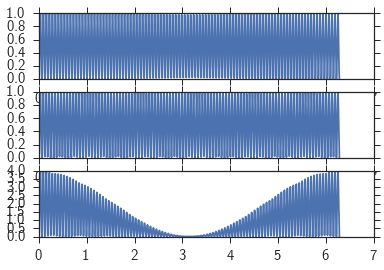

In [3]:
a_0 = csts['Bohr radius']

def rydberg_radius(n):
    return a_0*n**2

def rydberg_circumference(n):
    return 2*np.pi*rydberg_radius(n)

x = np.linspace(0, 2*np.pi, 1000)

fig = plt.figure()
axe1 = fig.add_subplot(311)
axe1.plot(x, np.sin(x*50)**2)

axe2 = fig.add_subplot(312)
axe2.plot(x, np.sin(x*51)**2)

axe3 = fig.add_subplot(313)
axe3.plot(x, (np.sin(x*50)+np.sin(x*51))**2)

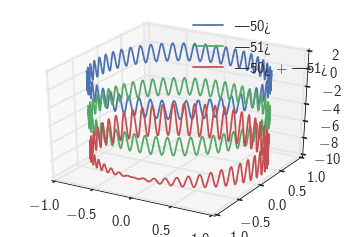

In [4]:
xs = np.sin(x)
ys = np.cos(x)
zs_1 = np.sin(x*50)
zs_2 = np.sin(x*51) - 4
zs_3 = zs_1+zs_2 - 4

labels = ['|50>', '|51>', '|50> + |51>']

fig = plt.figure()
axe3d = fig.gca(projection='3d')

for i, zs in enumerate([zs_1, zs_2, zs_3]):
    axe3d.plot(xs, ys, zs, label=labels[i])

axe3d.legend() 

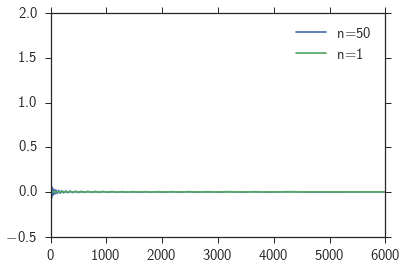

In [5]:
from scipy.special import eval_genlaguerre

x = np.linspace(0, 6000, 10000) 
def s_wave(r, n):
    pre = 0.5*np.sqrt(2**3/(2*np.pi*n**5))
    L_n = eval_genlaguerre(n-1, 1, 2*r/n)
    return pre*np.exp(-r/n)*L_n

plt.plot(x, s_wave(x, 50)/np.sum(s_wave(x,50)), label='n=50')
plt.plot(x, s_wave(x, 1)/np.sum(s_wave(x,1)), label='n=1')
#plt.plot(x, eval_genlaguerre(50,1,x), label='lag')
#plt.plot(x, np.exp(-x/50), label='exp')



plt.legend()

1.53830706568


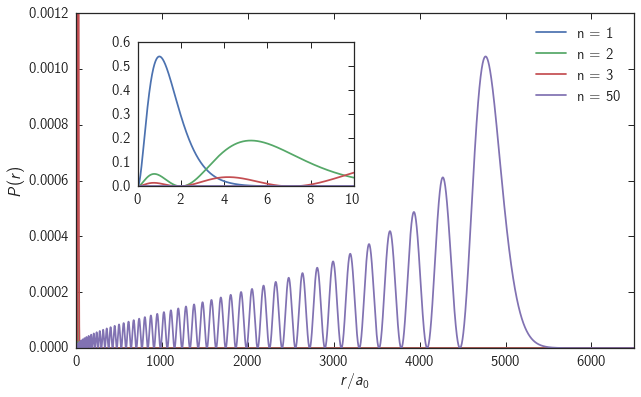

In [6]:
from scipy.integrate import quad
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def s_wave_r(r, n): # integration over volume between r_low and r_high
    psi_r = 4*np.pi*r**2*s_wave(r,n)**2
    return psi_r


x = np.linspace(0, 6500, 10000)
x2 = np.linspace(0, 10, 1000)

fig = plt.figure(figsize=(10,6))
axe = fig.add_subplot(111)
axeins = inset_axes(axe, width=3, height=2, bbox_to_anchor=(0.2,0.85), loc=2, bbox_transform=axe.figure.transFigure)

for n in [1,2,3,50]:
    axe.plot(x, s_wave_r(x, n), label='n = {0}'.format(n))
    axeins.plot(x2, s_wave_r(x2, n))
#plt.plot(x, s_wave_r(x, 51)**2)
#plt.plot(x, (s_wave_50+s_wave_51)**2)
axe.set_ylim(ymax = 0.0012)
axe.set_xlim(xmax=6500)

#mark_inset(axe, axeins, loc1=2, loc2=4, fc='none', ec='0.5')
for a in [axe, axeins]:
    for d in ['x', 'y']:
        a.tick_params(axis=d, direction='in')
        if a == axeins and d =='y':
            a.tick_params(axis=d, left='off')
print(np.sum(s_wave_r(x, 30)))

axe.set_xlabel('$r / a_0$')
axe.set_ylabel('$P(r)$')
axe.legend()

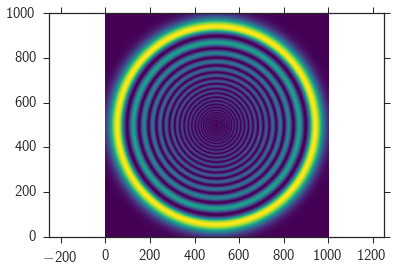

In [7]:
X = np.linspace(-np.sqrt(2)*1000, np.sqrt(2)*1000, 1000)
X, Y = np.meshgrid(X,X)
R = np.sqrt(X**2 + Y**2)
Z = s_wave_r(R, 26)

'''
fig = plt.figure()
axe = fig.gca(projection='3d')

surf = axe.plot_surface(X,Y,Z, cmap='viridis', linewidth=0)
'''

fig1d = plt.figure()
axe1d = fig1d.add_subplot(111)

axe1d.pcolor(Z, cmap='viridis')
axe1d.axis('equal')

fig1d.savefig('../Figures/s_wave_26.jpg')